In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('virginia-history.csv', index_col=0)
num_cases = np.flip(data.iloc[0:180]['hospitalizedCurrently'].to_numpy())
time_index = np.linspace(0,180,180)
num_days = len(time_index)

Text(0, 0.5, 'Num cases')

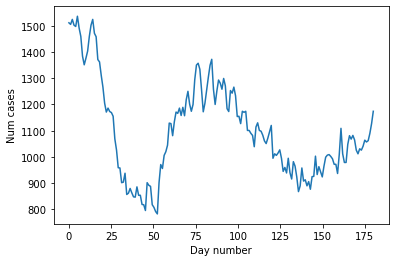

In [18]:
plt.plot(time_index, num_cases)
plt.xlabel('Day number')
plt.ylabel('Num cases')

In [33]:
num_cases_smooth = np.zeros(len(num_cases))
for i in range(len(num_cases_smooth)):
    count = 0
    sum = 0
    
    #sometimes the 4 days before and the 4 days after may not exist\n",
    #if it does not exist just do not include it in the average\n",
    if i-4>=0:
        sum = sum + num_cases[i-4]
        count = count + 1
    if i-3>=0:
        sum = sum + num_cases[i-3]
        count = count + 1
    if i-2>=0:
        sum = sum + num_cases[i-2]
        count = count + 1
    if i-1>=0:
        sum = sum + num_cases[i-1]
        count = count + 1
    #current element always exists
    sum = sum + num_cases[i]
    count = count + 1
    if i+1<len(num_cases_smooth):
        sum = sum + num_cases[i+1]
        count = count + 1
    if i+2<len(num_cases_smooth):
        sum = sum + num_cases[i+2]
        count = count + 1
    if i+3<len(num_cases_smooth):
        sum = sum + num_cases[i+3]
        count = count + 1
    if i+4<len(num_cases_smooth):
        sum = sum + num_cases[i+4]
        count = count + 1

    avg = sum/count
    num_cases_smooth[i] = avg

Text(0, 0.5, 'Num cases (smooth)')

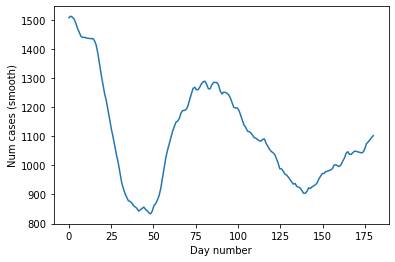

In [34]:
plt.plot(time_index, num_cases_smooth)
plt.xlabel('Day number')
plt.ylabel('Num cases (smooth)')

In [35]:
from scipy.interpolate import UnivariateSpline

In [36]:
interpolan = UnivariateSpline(time_index, num_cases_smooth, k=2, s=0)

In [37]:
point = 4
error_at_one_point = abs(num_cases_smooth[point] - interpolan(point))

In [38]:
error_at_one_point

0.3624272276058491

In [39]:
interpolationPoints = np.zeros(len(num_cases_smooth))
for i in range(len(num_cases_smooth)):
    interpolationPoints[i] = interpolan(i)

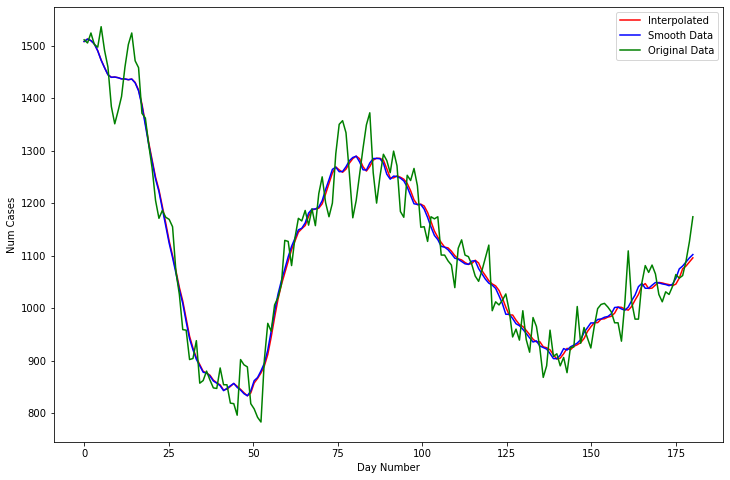

In [40]:
plt.figure(figsize=(12,8))
plt.plot(time_index, interpolationPoints, 'r', label = 'Interpolated')
plt.plot(time_index, num_cases_smooth, 'b',label = 'Smooth Data')
plt.plot(time_index, num_cases, 'g',label = 'Original Data')
plt.xlabel('Day Number')
plt.ylabel('Num Cases')
plt.legend()

In [41]:
#the interpolation follows the smooth data very well
#the interpolation also follows the original data well but does not follow the peaks and troughs of it

In [42]:
error_all_days = np.zeros(len(num_cases))
for i in range(len(num_cases)):
    error_all_days[i] = abs(interpolationPoints[i] - num_cases[i])

In [43]:
error_all_days

array([  3.2       ,   7.49782114,  14.51900767,   1.28238307,
         6.74868388,  63.43355613,  32.74964125,  14.28605809,
        55.6159028 ,  89.10430219,  62.89849488,  33.62537549,
        22.50118971,  67.01170692,  87.63819784,  41.10557272,
        42.36375675,  17.6692996 ,   9.4136994 ,   3.97831231,
        15.77223713,  44.27465672,  54.27971404,   7.65368565,
        10.83797525,  40.94566102,  54.80555219,   2.02719507,
        13.48112983,  54.53880282,  22.15577425,  44.47267752,
        20.06914866,  32.55863367,  35.56822653,  17.52738967,
         3.55546034,   9.16363998,  14.8866514 ,  10.7416398 ,
        32.24497237,  10.0405743 ,   8.30179293,  31.74006577,
        38.44877301,  55.01595159,  56.78123341,  53.20299157,
        54.96577776,  20.32407932,  49.34262132,  74.02283946,
        93.42228682,  11.98061644,  59.48899983,  11.40180526,
        24.10247715,   3.40581482,   0.59361935,  61.98562298,
        36.96005941,  30.501165  ,   6.37130563,  26.44